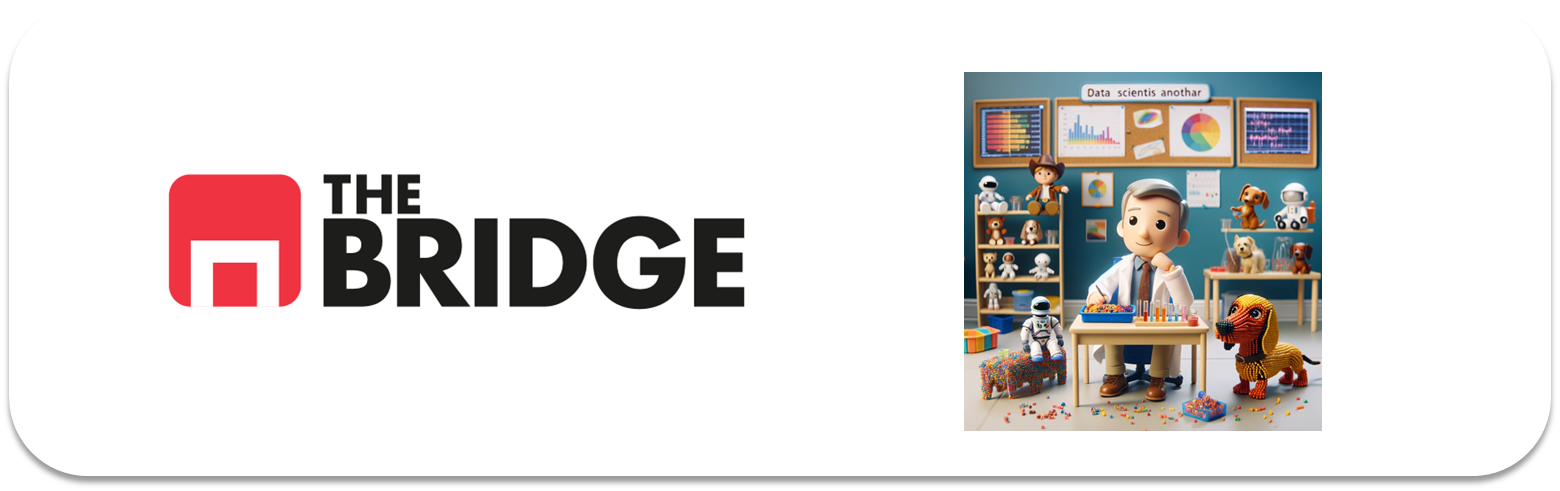

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [129]:

print(sns.get_dataset_names())

df_titanic = sns.load_dataset('titanic')
df_titanic

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [130]:
print(df_titanic.info())
df_titanic.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


- Con 'df_titanic.info()' vemos que hay nulos en las siguientes columnas:
    - 'age': 177 nulos,
    - 'embarked': 2 nulos,
    - 'deck': 688 nulos,
    - 'embark_town': 2 nulos

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [131]:
with_nan = [
    'age',
    'embarked',
    'deck',
    'embark_town']

for column in df_titanic[['age','embarked','deck','embark_town']]:
    percentage = round(df_titanic[column].isna().sum() / len(df_titanic) * 100, 2)
    print(f"{column}: {percentage}% de nulos")

age: 19.87% de nulos
embarked: 0.22% de nulos
deck: 77.22% de nulos
embark_town: 0.22% de nulos


- **'age': media**   
   Tiene un porcentaje relativamente alto de datos nulos, pero dado que la edad me parece una variable importante y quiero mantener la columna, le daré el valor medio de la misma a los elementos faltantes.
      
- **'embarked': moda**   
   Dado que el porcentaje de valores nulos es muy bajo, le daré el valor de la moda a los elementos faltantes.
- **'deck': eliminar columna**   
   El porcentaje de nulos es demasiado elevado y darle el valor de la moda sería una acción poco precisa. La mejor opción es eliminar la columna, ya que los datos que aporta tampoco me parecen excesivamente relevantes por ahora.
- **'embark_town': moda**   
   Procederemos de la misma manera que con la columna 'embarked'

In [132]:
# Damos el valor de la media a los faltantes de la columna 'age'
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].mean())

# Damos el valor de la moda a los faltantes de la columna 'embarked'
# Al hacer .mode()[0] le estoy diciendo que si al hacer la moda, hay varios valores en el resultado, se quede con el primero
df_titanic['embarked'] = df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0])

# Eliminamos la columna 'embark_town' y 'parch'
df_titanic.drop(columns = ['deck', 'parch'], inplace = True)

# Damos el valor de la moda a los faltantes de la columna 'embark_town'
df_titanic['embark_town'] = df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0])

# Verificamos que ya no hay valores nulos
print(df_titanic.info())

# Mostramos el data frame modificado
df_titanic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB
None


,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,30.0000,C,First,man,True,Cherbourg,yes,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
|survived|Si sobrevivió (1) o no (0)|
|pclass|La clase en la que viajaba|
|sex|Hombre o mujer|
|age|Edad en años|
|sibsp|Número de familiares que viajan con la persona|
|fare|Precio pagado por el billete (suponemos que en $)|
|embarked|Puerto de embarque del pasajero|
|class|La clase en la que viajaba|
|who|Hombre, mujer o niño|
|adult_male|Indica si el pasajero es un hombre adulto (True) o no (False)|
|embark_town|Ciudad de embarque del pasajero|
|alive|Si sobrevivió (yes) o no (no)|
|alone|Indica si el pasajero estaba viajando solo (True) o no (False)|



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [133]:
# Diccionario para cambiar las iniciales por los nombres completos
initial_letters = {
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
}

# Con .map() reemplazamos las iniciales por los nombres completos
df_titanic['embarked'] = df_titanic['embarked'].map(initial_letters)

# Ahora las columnas 'embarked' y 'embark_town' son iguales, asique podríamos eliminar una de las dos
# Lo mismo pasa con 'pclass' y 'class', y con 'survived' y 'alive', que nos proporcionan la misma información, pero de diferente manera
# Vamos a proceder a eliminar estas columnas
df_titanic.drop(columns = ['embark_town', 'pclass', 'alive'], inplace = True)
df_titanic

# También vamos a pasar la columna 'age' de float a int
df_titanic['age'] = df_titanic['age'].astype(int)

# Veamos cómo ha quedado el data frame después de limpiarlo finalmente
df_titanic

,survived,sex,age,sibsp,fare,embarked,class,who,adult_male,alone
0,0,male,22,1,7.2500,Southampton,Third,man,True,False
1,1,female,38,1,71.2833,Cherbourg,First,woman,False,False
2,1,female,26,0,7.9250,Southampton,Third,woman,False,True
3,1,female,35,1,53.1000,Southampton,First,woman,False,False
4,0,male,35,0,8.0500,Southampton,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...
886,0,male,27,0,13.0000,Southampton,Second,man,True,True
887,1,female,19,0,30.0000,Southampton,First,woman,False,True
888,0,female,29,1,23.4500,Southampton,Third,woman,False,False
889,1,male,26,0,30.0000,Cherbourg,First,man,True,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

In [134]:
# Primero creo una lista con las variables categóricas
cat_cols = [
    'sex',
    'who',
    'class',
    'embarked',
    'alone'
]

#### Frecuencias absolutas

sex
male      577
female    314
Name: count, dtype: int64
who
man      537
woman    271
child     83
Name: count, dtype: int64
class
Third     491
First     216
Second    184
Name: count, dtype: int64
embarked
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
alone
True     537
False    354
Name: count, dtype: int64


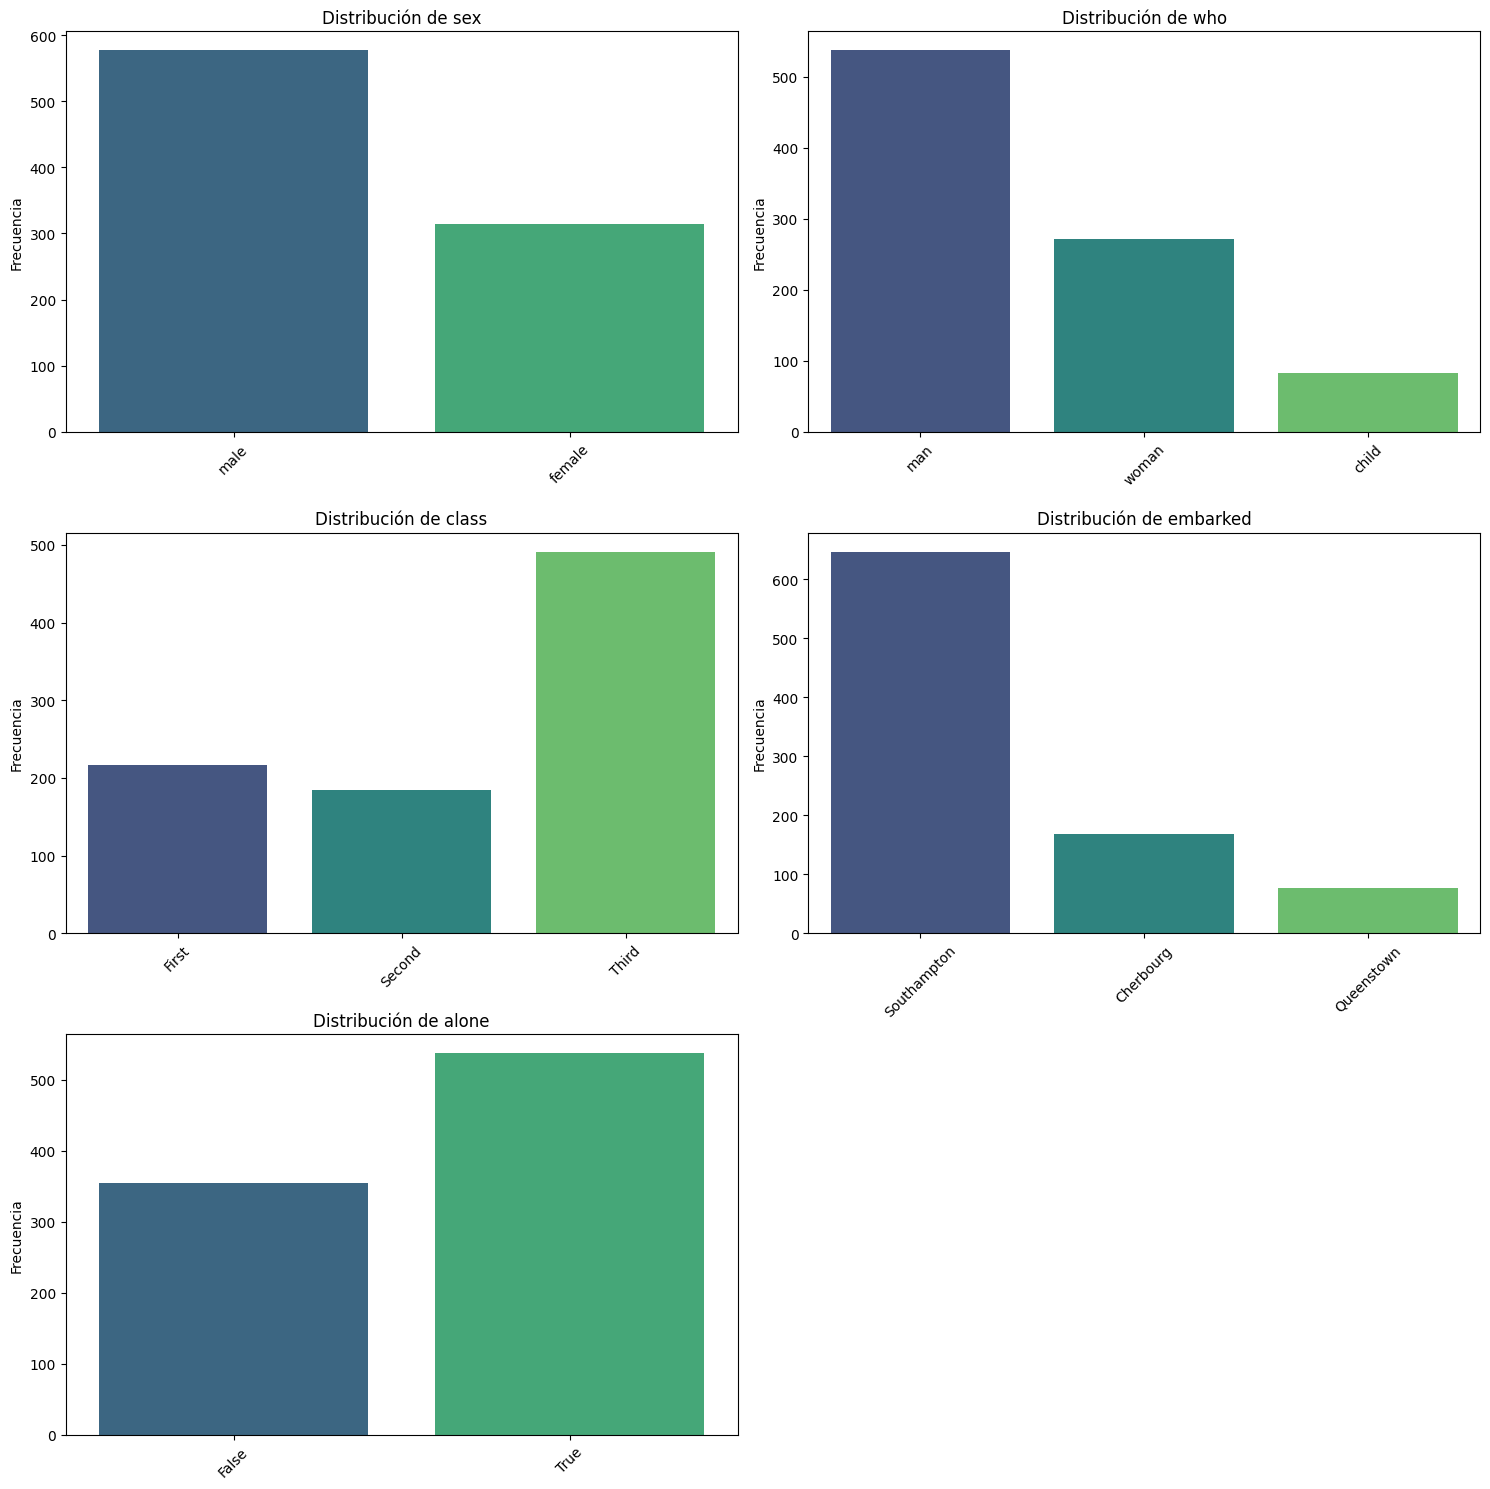

In [135]:
# Forma numérica
for cat in df_titanic[cat_cols]:
    print(df_titanic[cat].value_counts())

# Forma gráfica
from bootcampviztools import pinta_distribucion_categoricas
pinta_distribucion_categoricas(df_titanic, cat_cols)

#### Frecuencias relativas

sex
male      64.758698
female    35.241302
Name: count, dtype: float64
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64
embarked
Southampton    72.502806
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64
alone
True     60.26936
False    39.73064
Name: count, dtype: float64


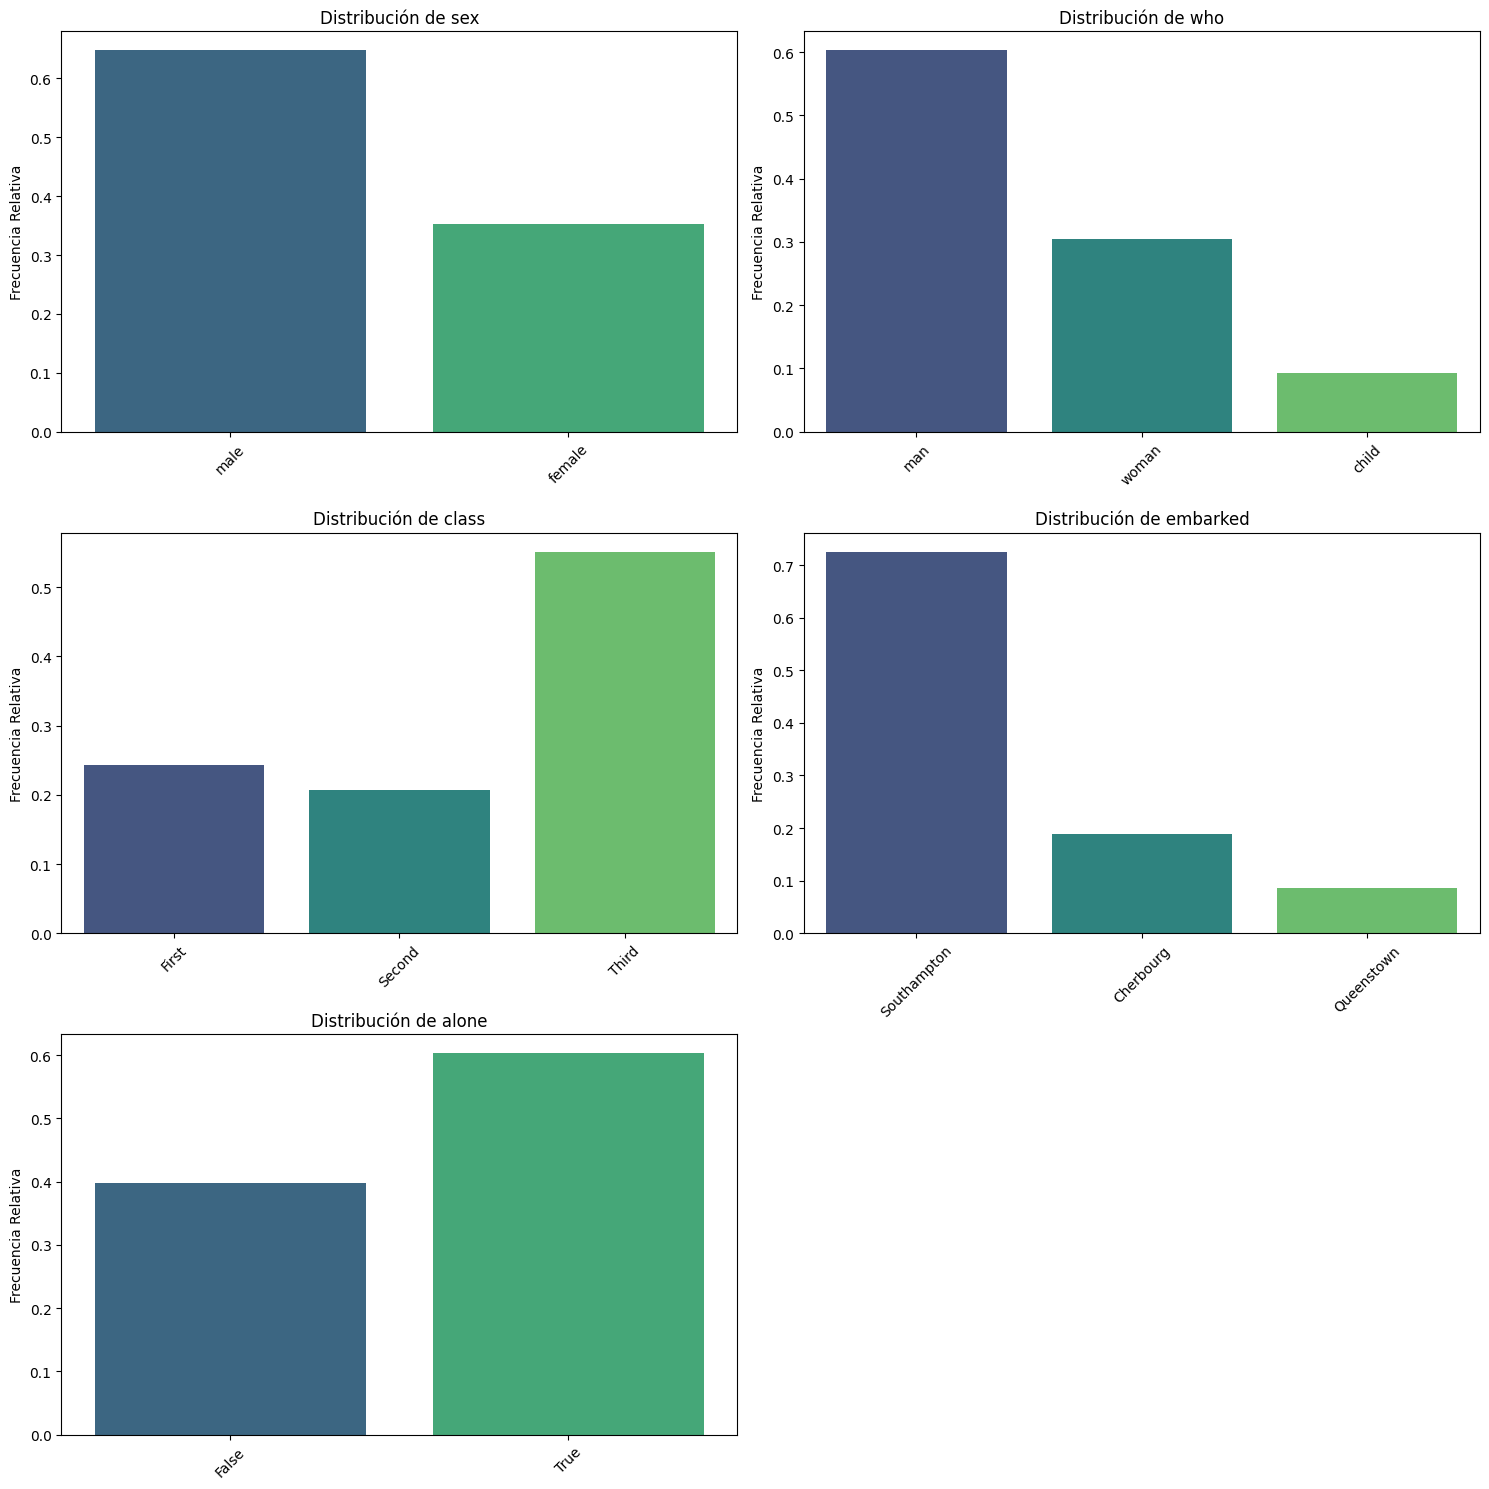

In [136]:
# Forma numérica
for cat in df_titanic[cat_cols]:
    print(df_titanic[cat].value_counts()/len(df_titanic)*100)

# Forma gráfica
pinta_distribucion_categoricas(df_titanic, cat_cols, relativa=True)

#### Perfil típico de viajero

In [137]:
df_titanic[cat_cols].mode().T

,0
sex,male
who,man
class,Third
embarked,Southampton
alone,True


### #2.2 Numéricas

#### Primer acercamiento

In [139]:
# Primero creo una lista con las columnas numéricas
num_cols = [
    'survived',
    'age',
    'fare'
]

In [143]:
# Echo un primer vistazo a los datos más relevantes de las columnas numéricas para hacerme una idea de los resultados
df_titanic[num_cols].describe()

,survived,age,fare
count,891.000000,891.000000,891.000000
mean,0.383838,29.544332,32.204208
std,0.486592,13.013778,49.693429
min,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400
50%,0.000000,29.000000,14.454200
75%,1.000000,35.000000,31.000000
max,1.000000,80.000000,512.329200


In [154]:
# Creo una función para saber el IQR de cada columna
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

# Me va a interesar solo los datos de la columnas no binarias
for col in df_titanic[['age', 'fare']]:
    print(col, ':', get_IQR(df_titanic, col))

age : 13.0
fare : 23.0896


- En ninguno de los dos casos, si comparamos ni el IQR es mayor que la mediana, ni es una proporción importante del rango, por lo que no son variables muy dispersas

#### Diagramas de caja

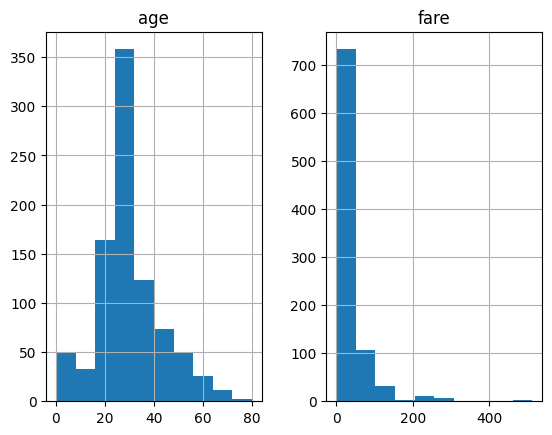

In [156]:
df_titanic[['age', 'fare']].hist();

- El gráfico de la columna 'age' tiene similitud con un gráfico del tipo 'Weibull'.
- El gráfico de la columna 'fare' tiene similitud con un gráfico del tipo 'Log Normal'.

(2, 2)


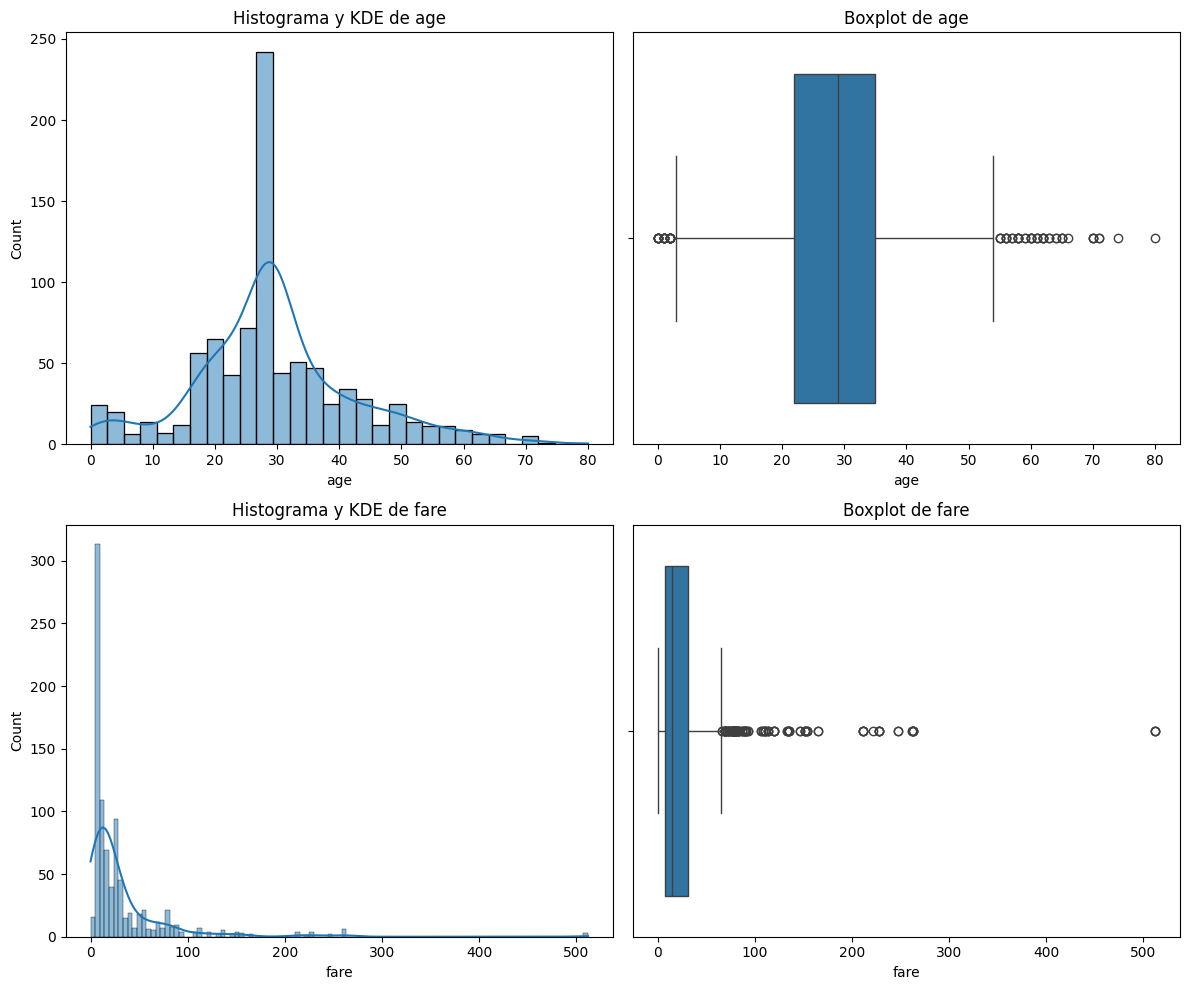

In [159]:
from bootcampviztools import plot_combined_graphs
plot_combined_graphs(df_titanic, ['age', 'fare'])


- Aunque las columnas 'age' y 'fare' dijimos que no tenían valores muy dispersos, sí que tienen bastantes valores anómalos, asique vamos a analizarlos.

(2, 2)


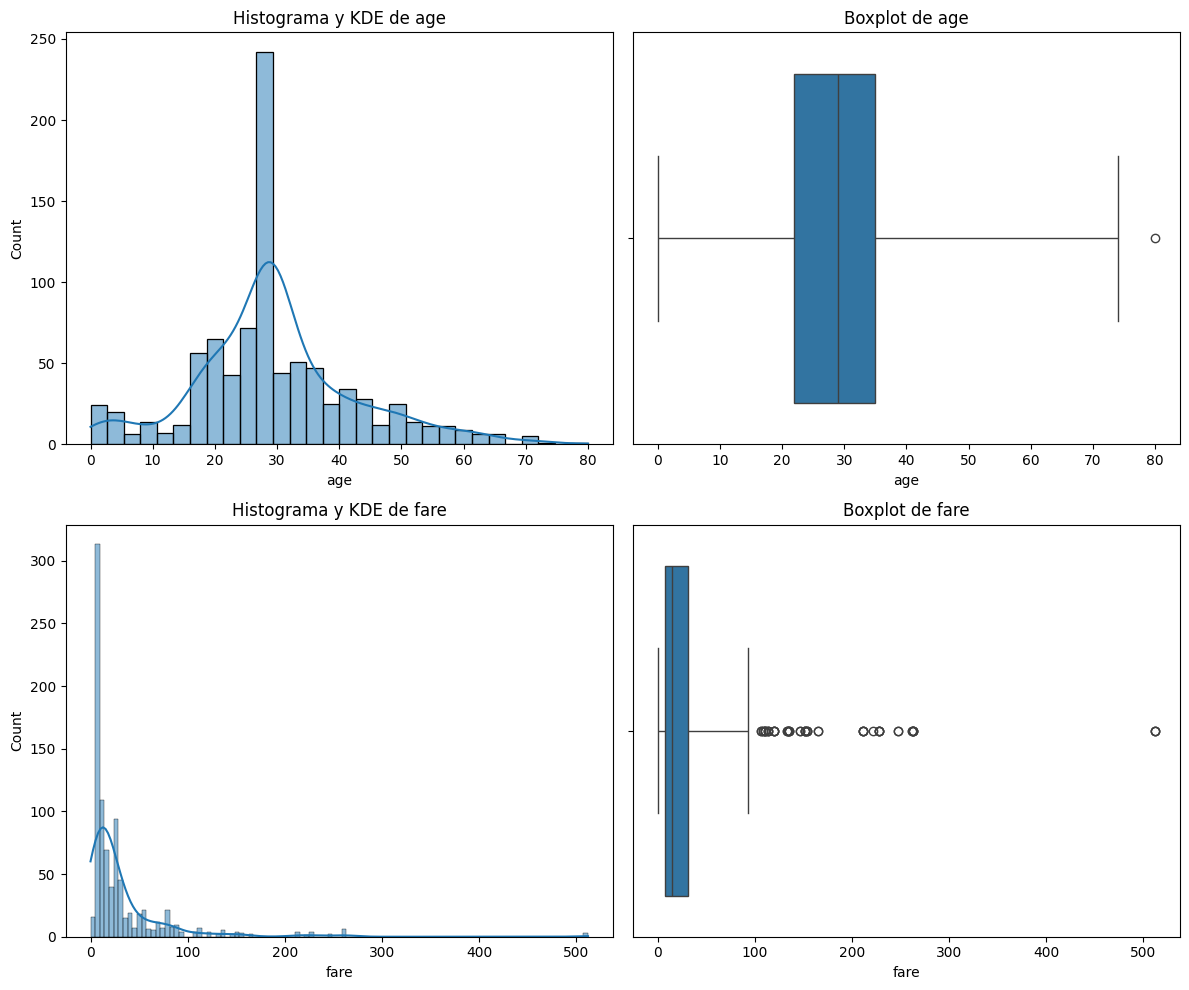

In [161]:
plot_combined_graphs(df_titanic, ['age', 'fare'], whisker_width=3)

- Observamos que la columna 'fare' es la que valores más dispersos tiene, por lo tanto es sobre la que nos interesaría profundizar

### CONCLUSIONES:

- **'sex'**:
    - La **mayoría de los pasajeros eran hombres**, constituyendo casi *dos tercios del total* de pasajeros.
    - La proporción de mujeres era significativamente menor que la de hombres, con poco más de un tercio del total.

- **'who'**:
    - La mayoría de los pasajeros eran adultos, con un 60.27% de hombres y un 30.42% de mujeres.
    - Los **niños** constituían una **minoría significativa**, representando menos del 10% de los pasajeros.

- **'class'**:
    - Más de la mitad de los pasajeros viajaban en tercera clase, indicando una predominancia de pasajeros de clase económica.
    - La primera clase tenía una representación significativa pero menor, con aproximadamente una cuarta parte de los pasajeros.
    - La segunda clase tenía la menor cantidad de pasajeros entre las tres clases, con un 20.65%.

- **'embarked'**:
    - La mayoría de los pasajeros embarcaron en Southampton, representando más del 70% del total (tiene sentido, ya que el Titanic es de procedencia británica).
    - Cherbourg y Queenstown tenían menos pasajeros, con Cherbourg representando casi el 19% y Queenstown menos del 9%.

- **'alone'**:
    - La mayoría de los pasajeros viajaban solos, un 60.27%.
    - Un porcentaje considerable de pasajeros, cerca del 40%, viajaba con algún acompañante.

- **'age'**:
    - La edad promedio de los pasajeros era de aproximadamente 30 años.
    - La distribución de las edades estaba relativamente centrada alrededor de los 29 años, con un rango intercuartil de 13 años.
    - Había una amplia variedad de edades entre los pasajeros, desde recién nacidos hasta personas de 80 años.

- **'fare'**:
    - La tarifa promedio pagada por los pasajeros era de 32.20, pero la mediana era significativamente más baja (14.45), indicando una distribución sesgada con algunas tarifas muy altas.
    - La alta desviación estándar sugiere una gran variabilidad en las tarifas pagadas por los pasajeros.
    - La mayoría de las tarifas estaban por debajo de los 31, con algunas tarifas extremadamente altas que elevaron la media.

El **perfil típico** de viajero es el de un hombre, que embarca en Southampton, viaja solo y en tercera clase.
